# Test `compare_tide_prediction_max_ssh` Module

Render figure object produced by the `nowcast.figures.publish.compare_tide_prediction_max_ssh` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
import io
from pathlib import Path

import arrow
import netCDF4 as nc
import yaml

from nowcast.figures.publish import compare_tide_prediction_max_ssh

Python and library versions:

In [2]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.2'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.5.0'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


## Simulate Nowcast System Config

The `config` multiline string contains the pieces of `nowcast/config/nowcast.yaml`
that are needed to set up the conditions as `nowcast.workers.make_plots` does
before calling the figure module `make_figure()` function.

The `yaml.safe_load()` call at the bottom of the cell converts the string into a `config` dict.

In [3]:
config = '''
    run types:
        forecast:
            bathymetry: bathymetry_202108.nc
            duration: 1.5  # days
        forecast2:
            bathymetry: bathymetry_202108.nc
            duration: 1.25  # days

    figures:
        dataset URLs:
            HRDPS fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV23-02
            tide stn ssh time series:
                # **Must be quoted to project {} characters**
                'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf{place}SSH10m'
        grid dir: /SalishSeaCast/grid/

    ssh:
        tidal_predictions: /SalishSeaCast/tidal-predictions/

    weather:
        ops_dir: /results/forcing/atmospheric/continental2.5/nemo_forcing/

    run:
        results_archive:
            forecast: /results/SalishSea/forecast.202111/
            forecast2: /results/SalishSea/forecast2.202111/
'''

config = yaml.safe_load(io.StringIO(config))

In [4]:
run_date = arrow.get('2025-01-28')
run_type = 'forecast'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'forecast': run_date.shift(days=+1).format('YYYYMMDD'),
    'forecast2': run_date.shift(days=+2).format('YYYYMMDD'),
}
end_day = {
    'forecast': run_date.shift(days=+2).format('YYYYMMDD'),
    'forecast2': run_date.shift(days=+3).format('YYYYMMDD'),
}
ymd = run_date.format('YYYYMMDD')

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [5]:
ssh_fcst_dataset_url_tmpl = config['figures']['dataset URLs']['tide stn ssh time series']

tidal_predictions = Path(config['ssh']['tidal_predictions'])

forecast_hrs = int(config['run types'][run_type]['duration'] * 24)

weather_path = Path(config['weather']['ops_dir'], 'fcst')

grid_dir = Path(config['figures']['grid dir'])
bathy = nc.Dataset(grid_dir / config['run types'][run_type]['bathymetry'])

grid_T_hr_path = results_dir/f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc'

/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py:524: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ttide = pd.read_csv(


23.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


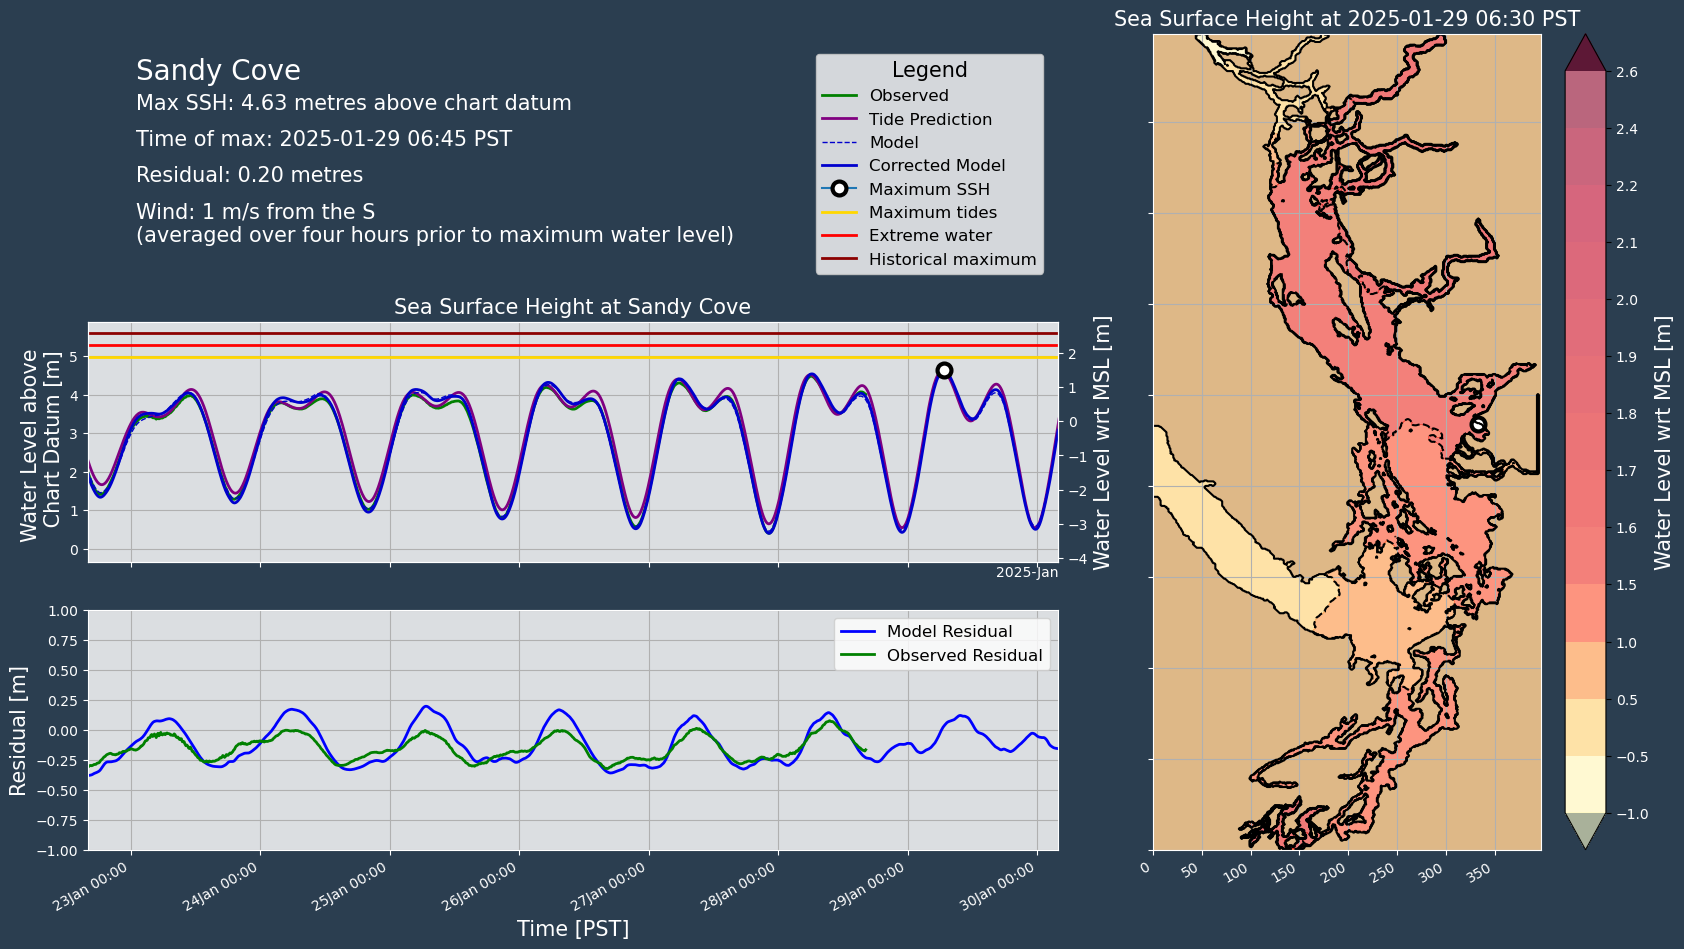

In [6]:
%%timeit -n1 -r1

from importlib import reload
from nowcast.figures import website_theme, shared
from salishsea_tools import places
reload(compare_tide_prediction_max_ssh)
reload(website_theme)
reload(shared)
reload(places)

fig = compare_tide_prediction_max_ssh.make_figure(
    'Sandy Cove', ssh_fcst_dataset_url_tmpl, tidal_predictions, forecast_hrs,
    weather_path, bathy, grid_T_hr_path, theme=website_theme
)

/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py:524: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ttide = pd.read_csv(
/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py:524: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ttide = pd.read_csv(
/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py:524: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ttide = pd.read_csv(
/media/doug/warehouse/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py

5min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


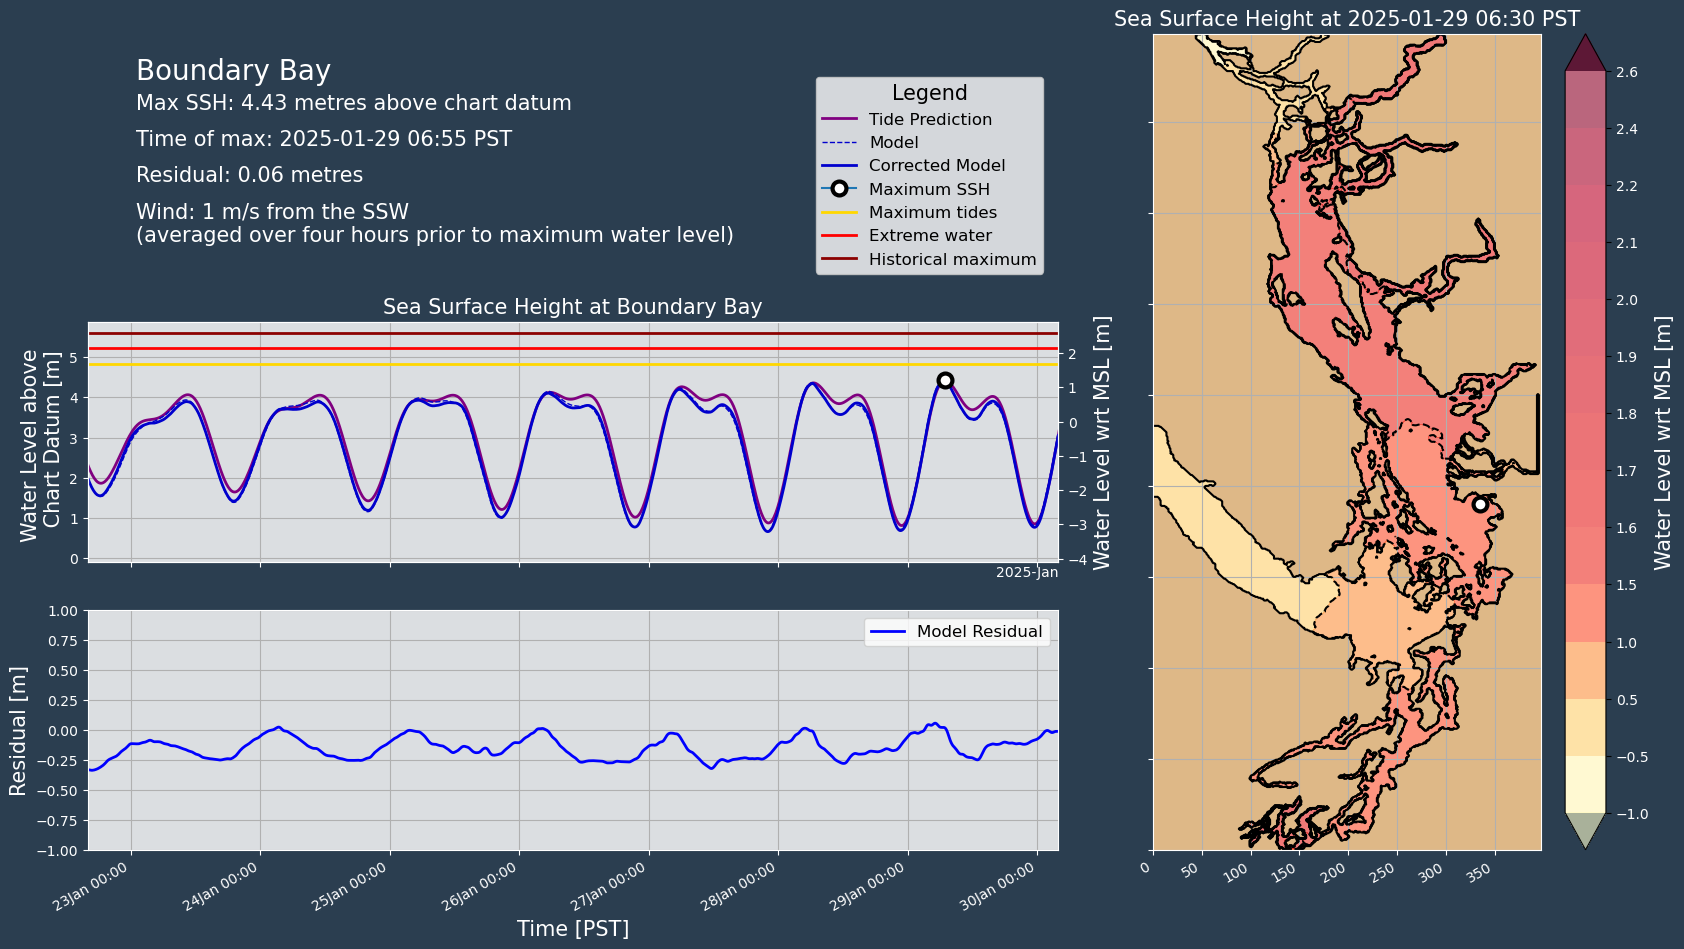

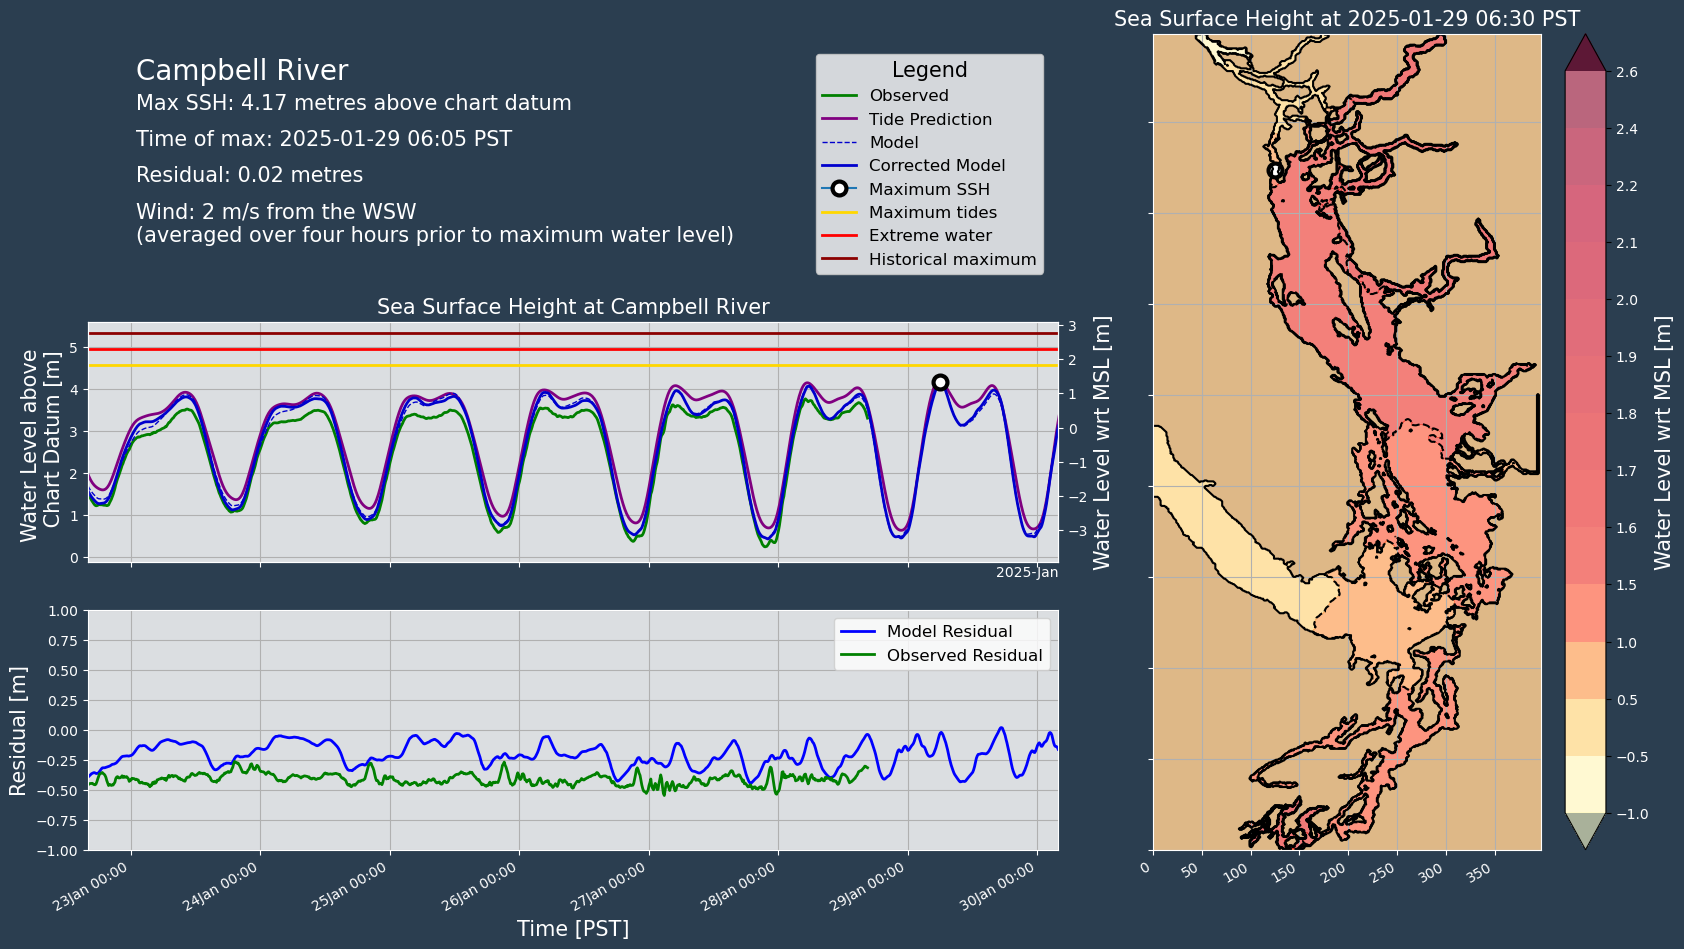

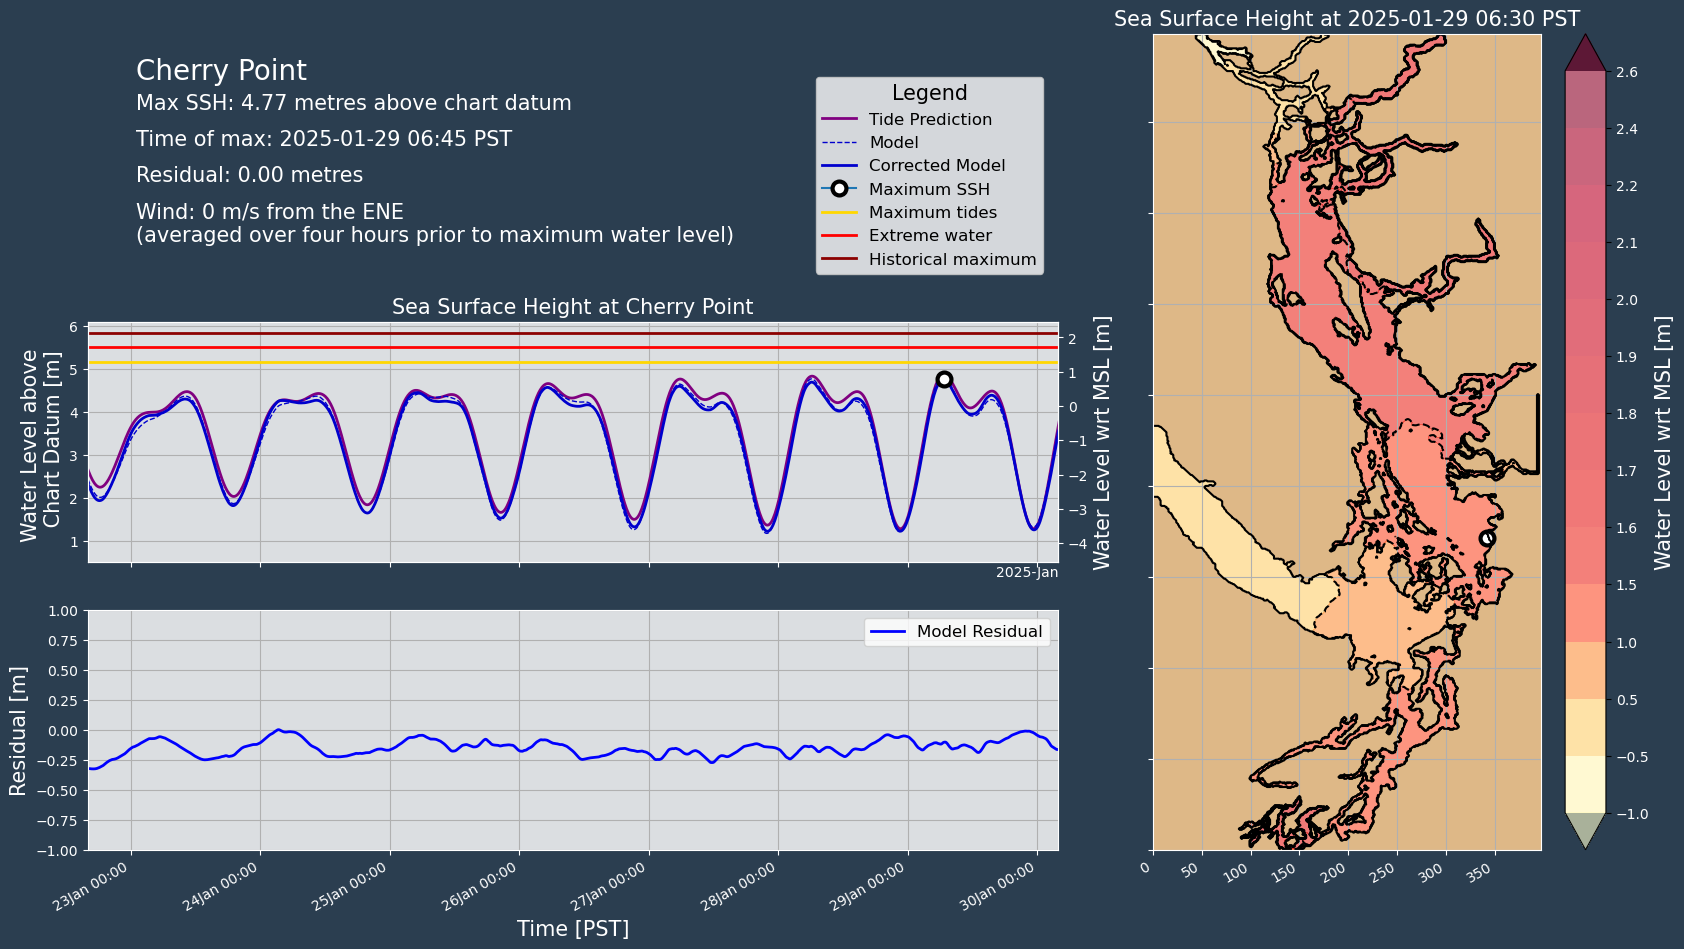

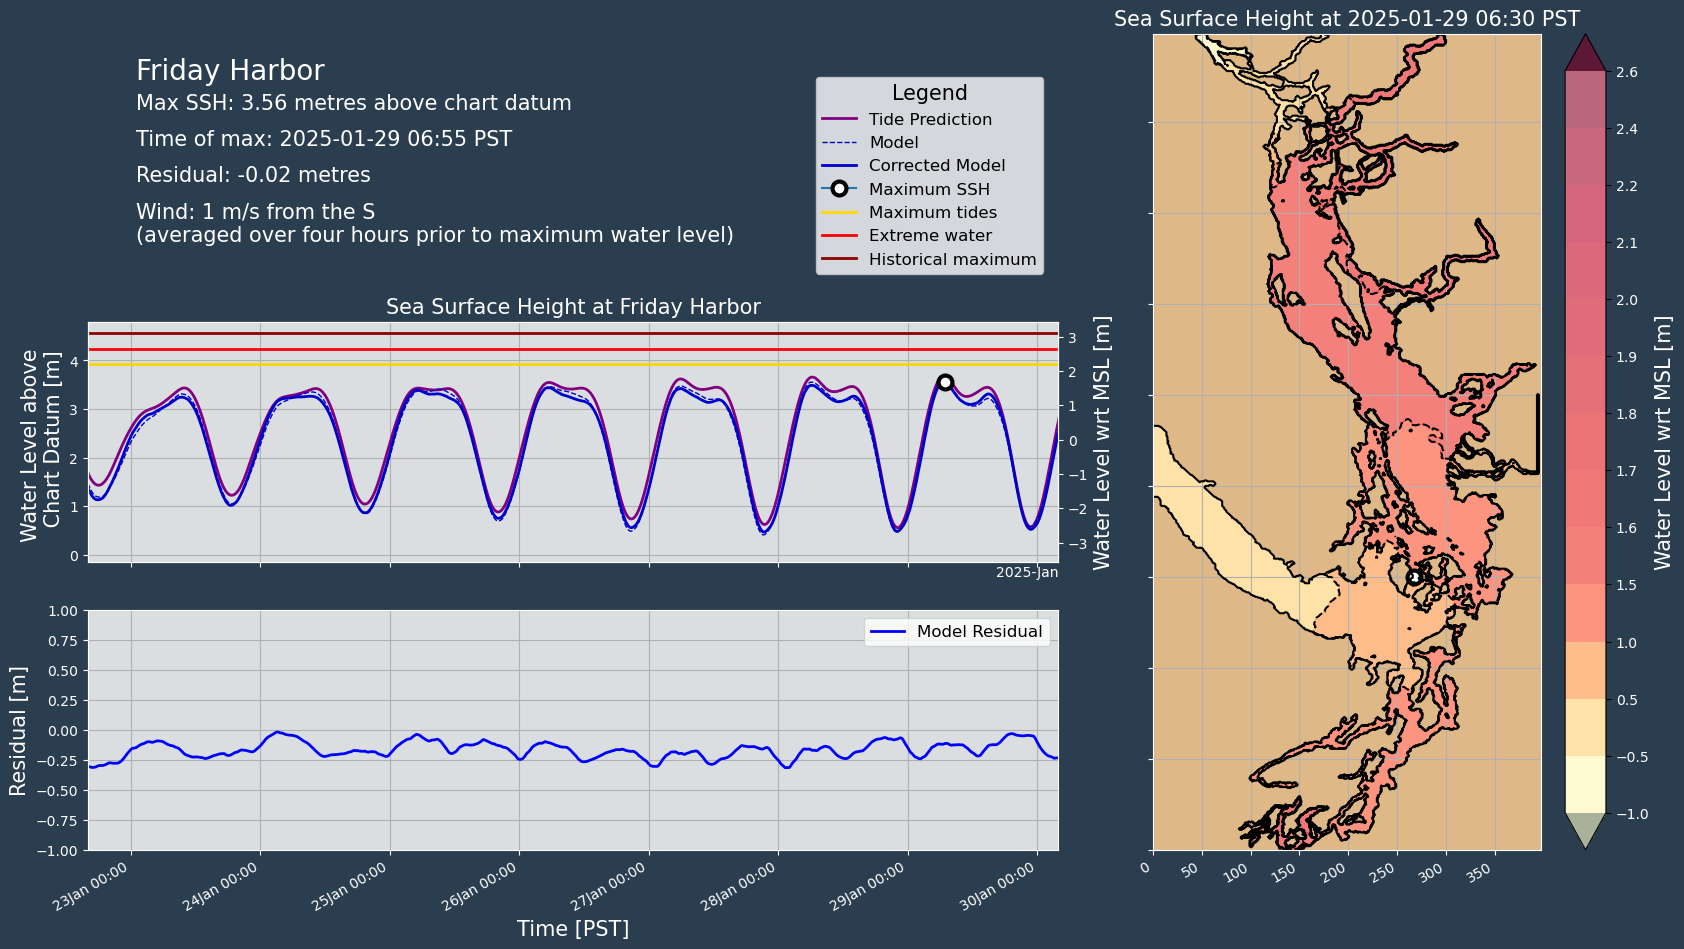

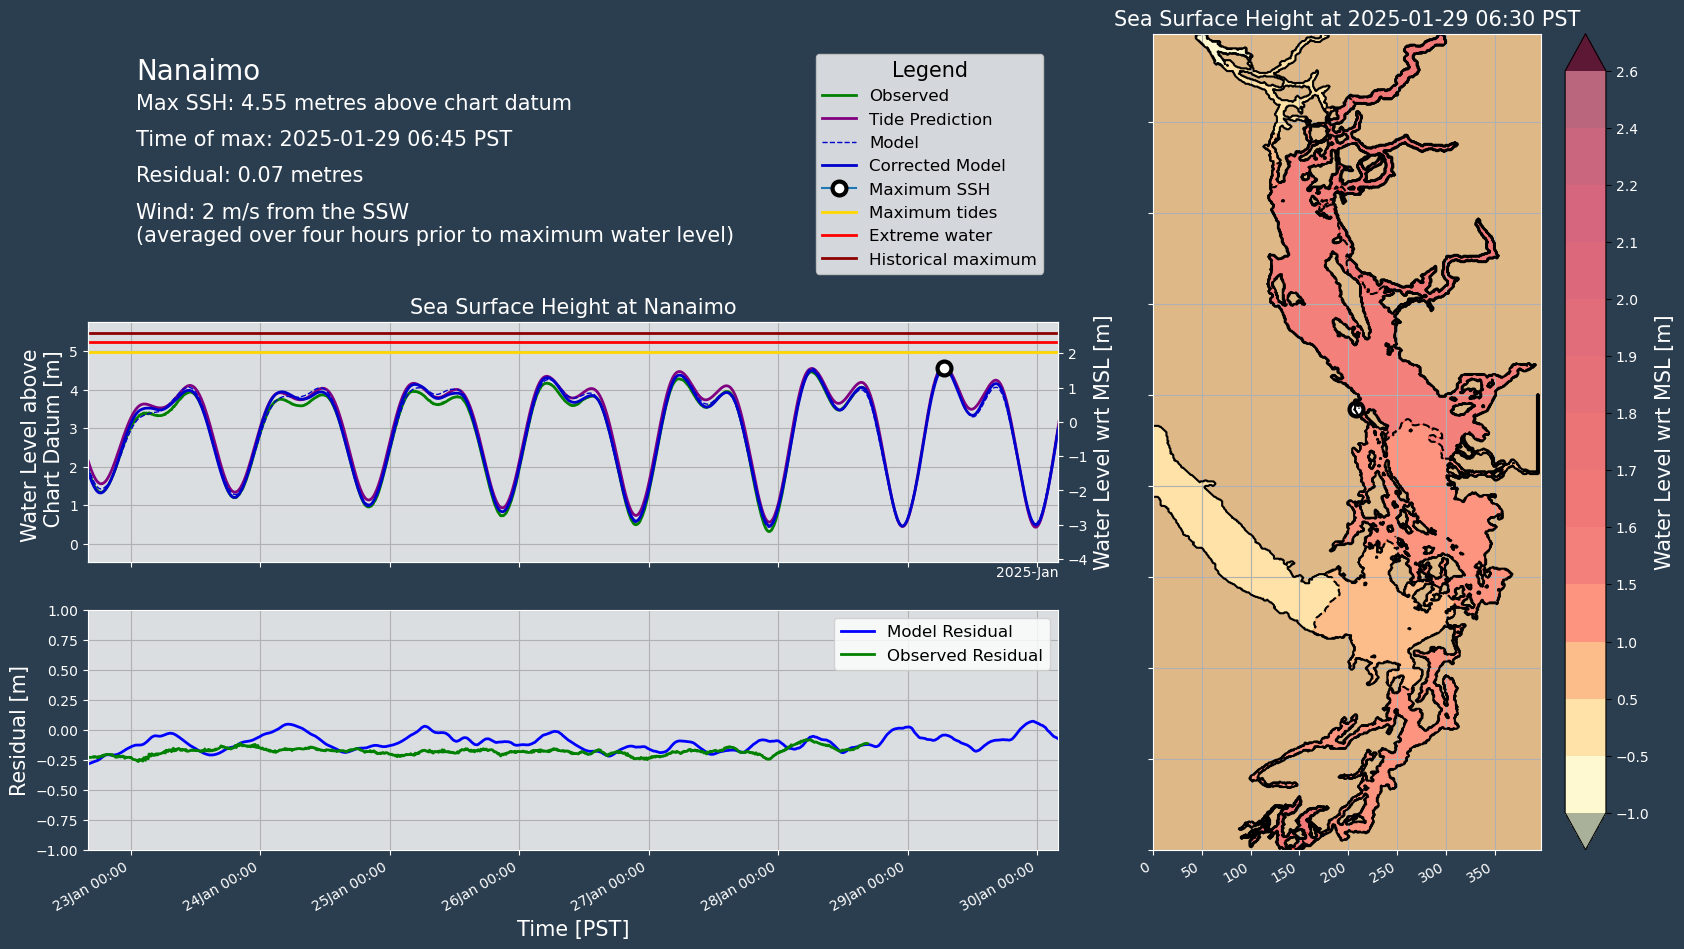

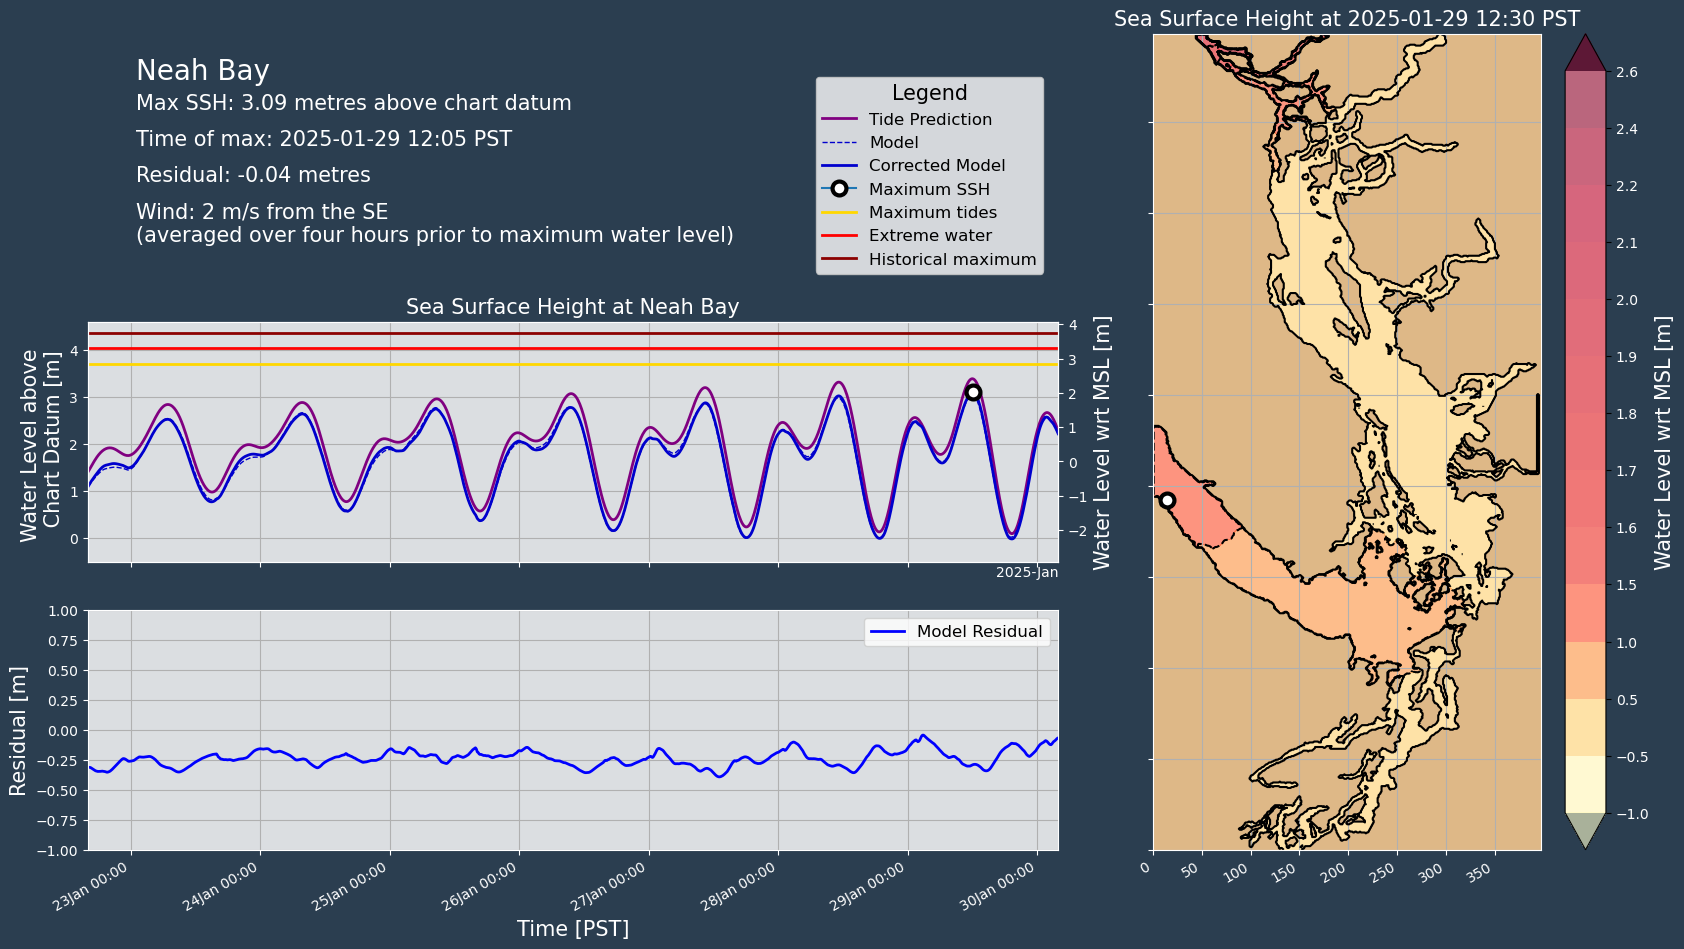

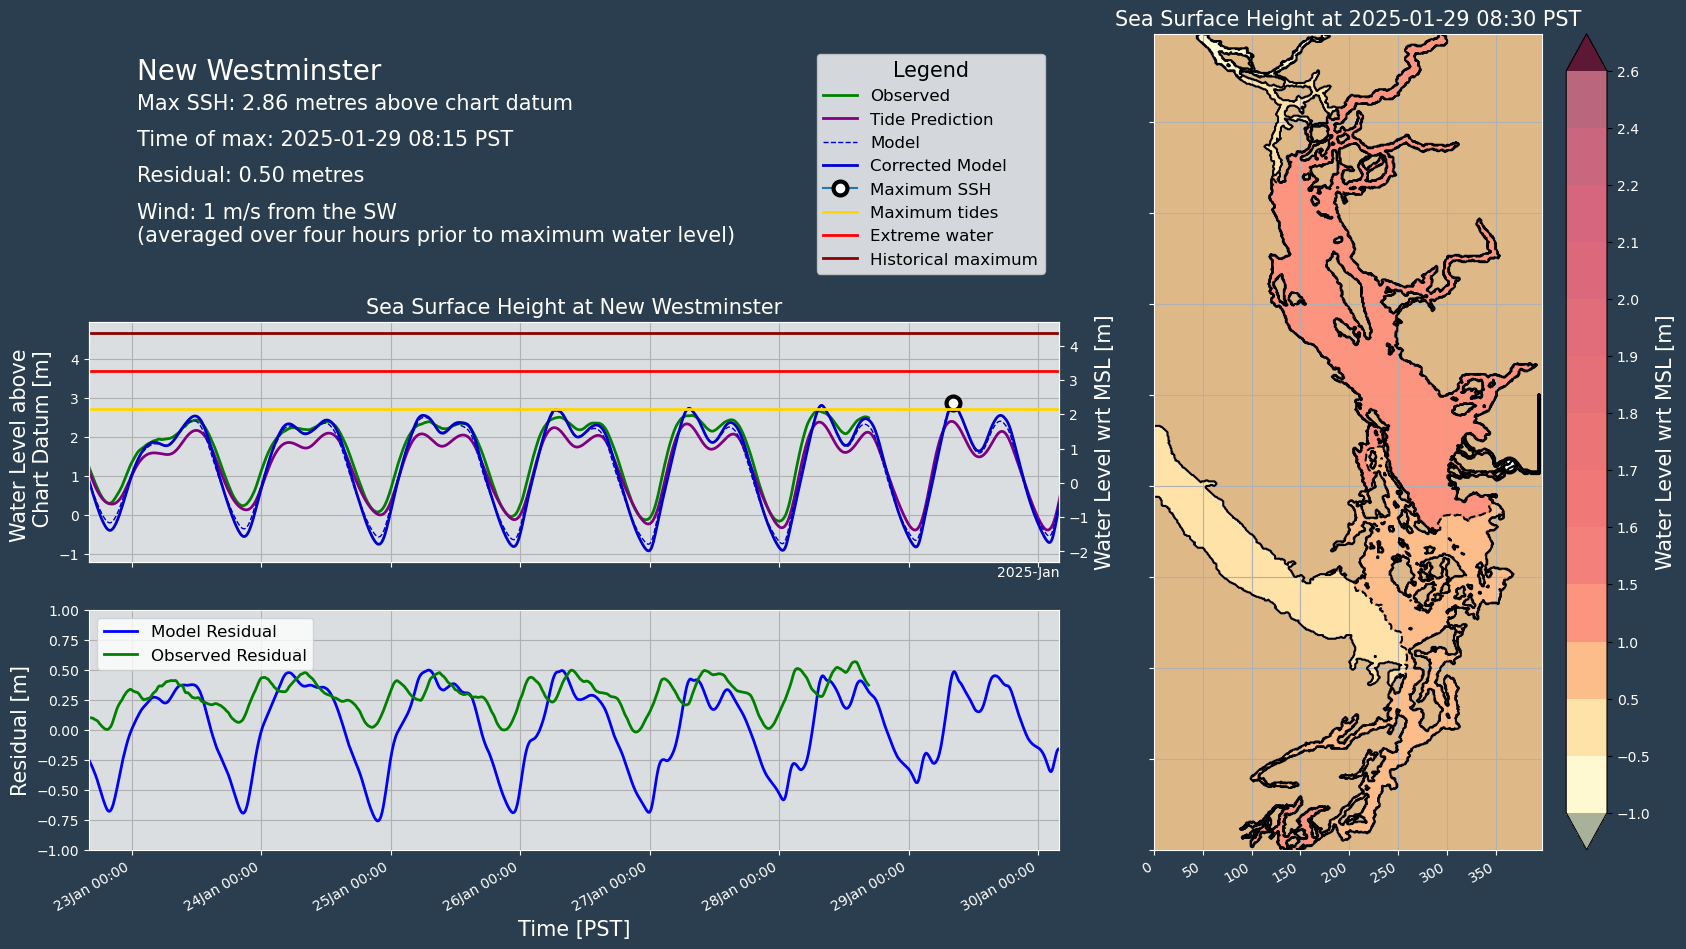

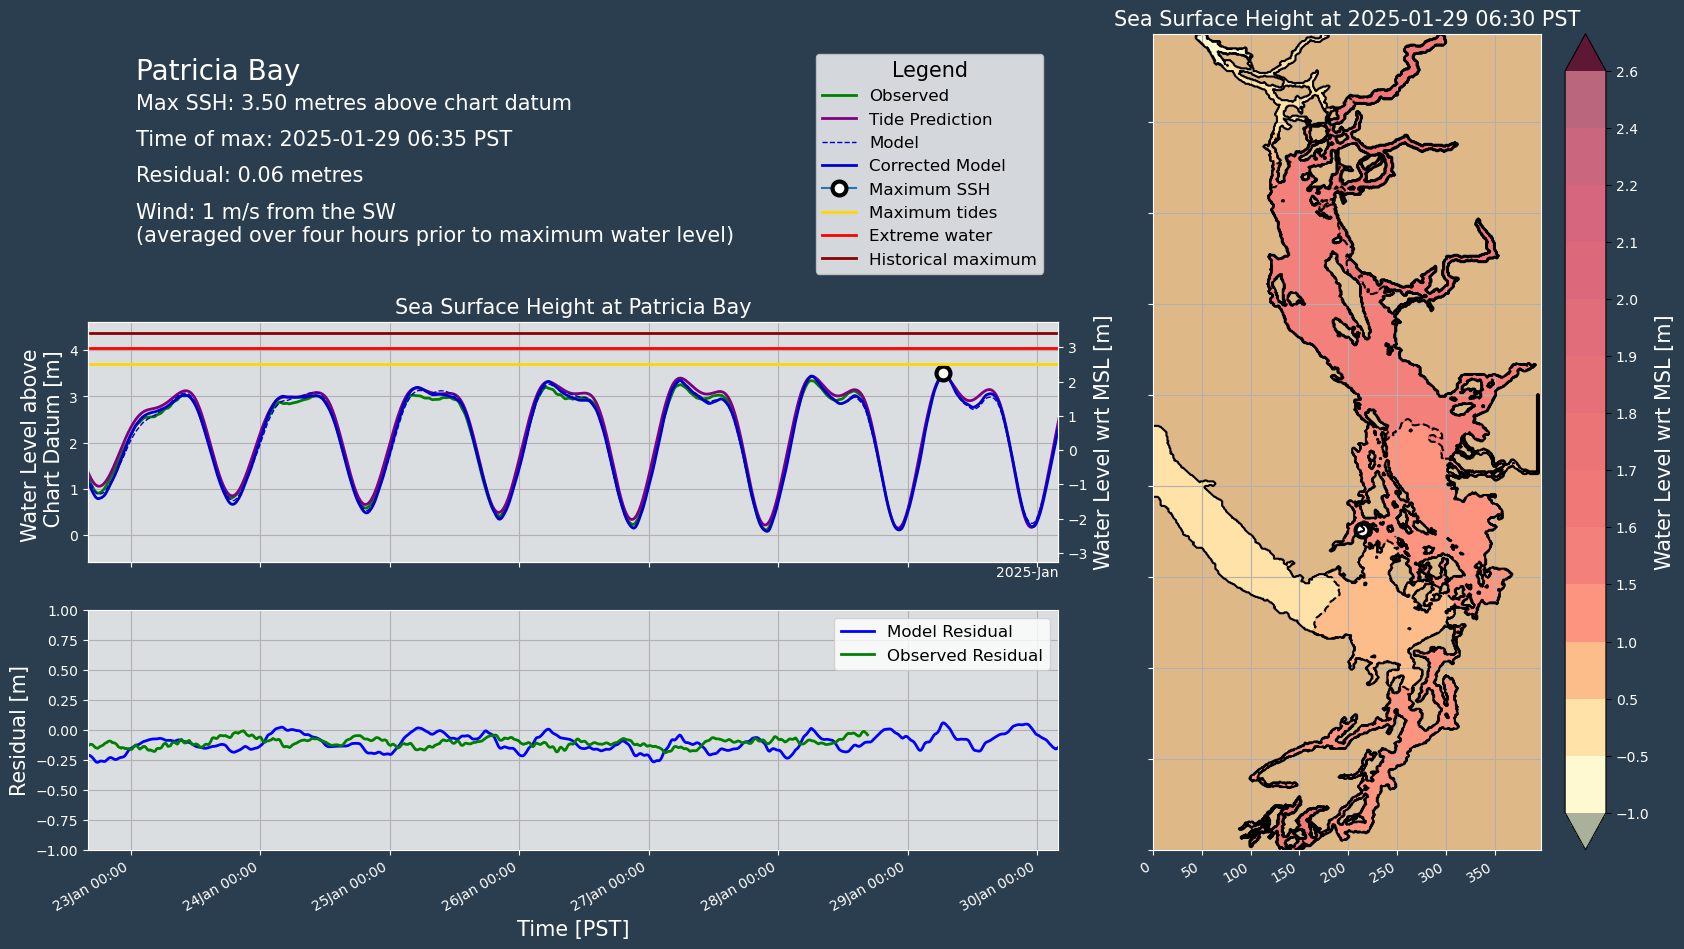

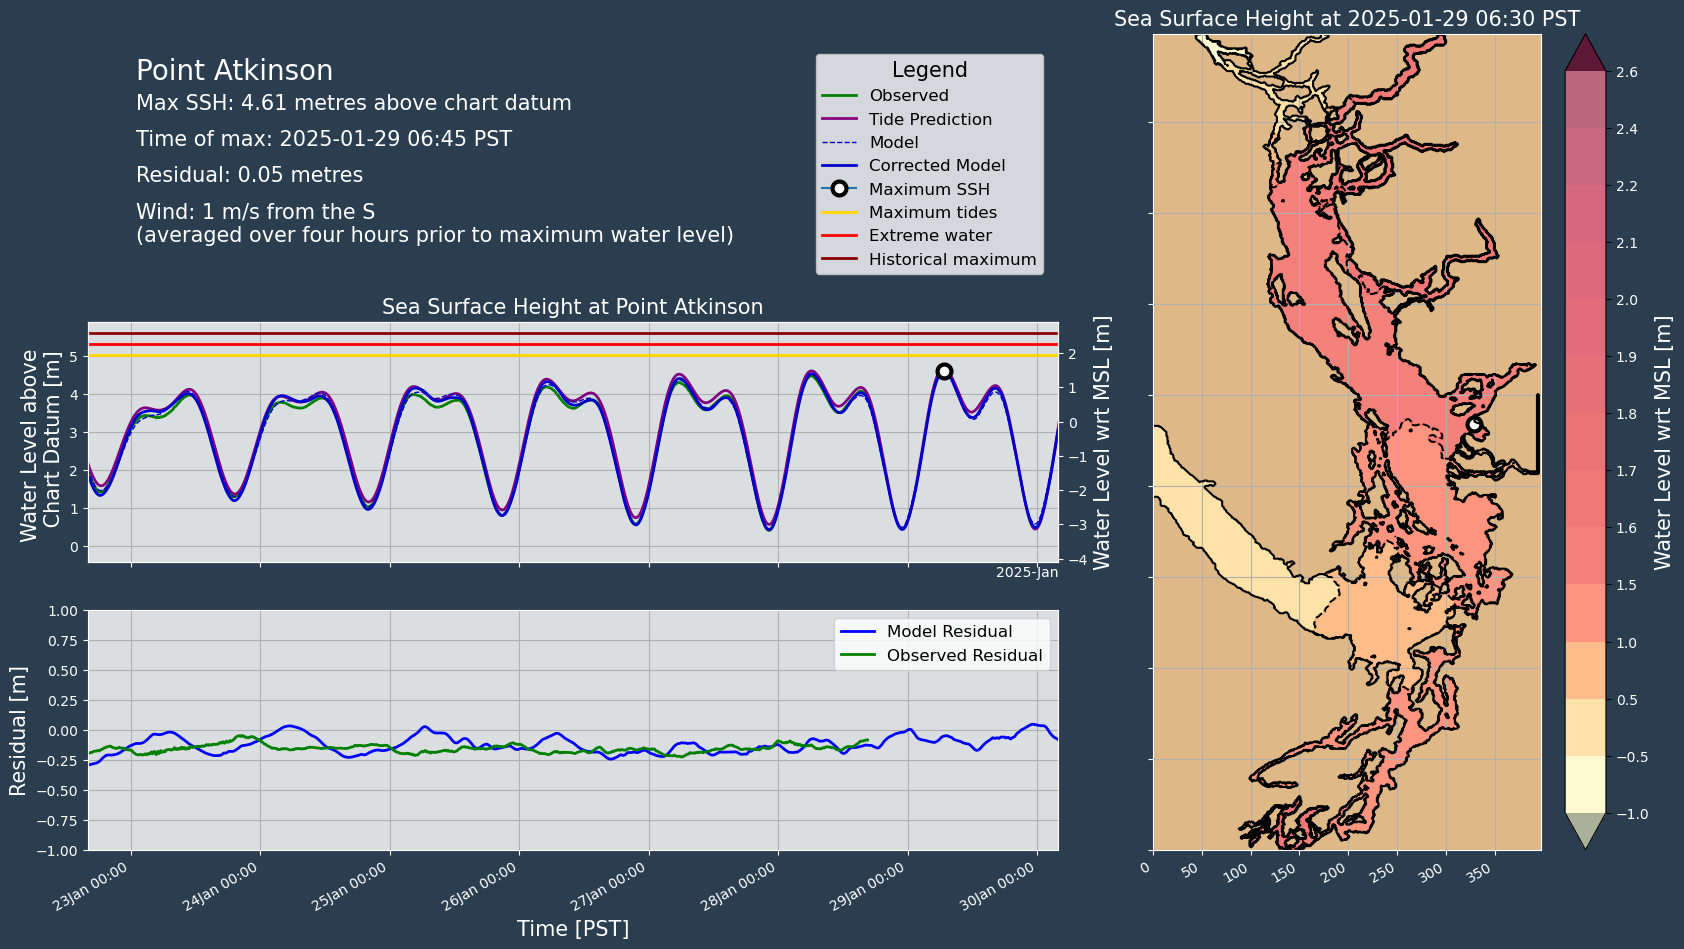

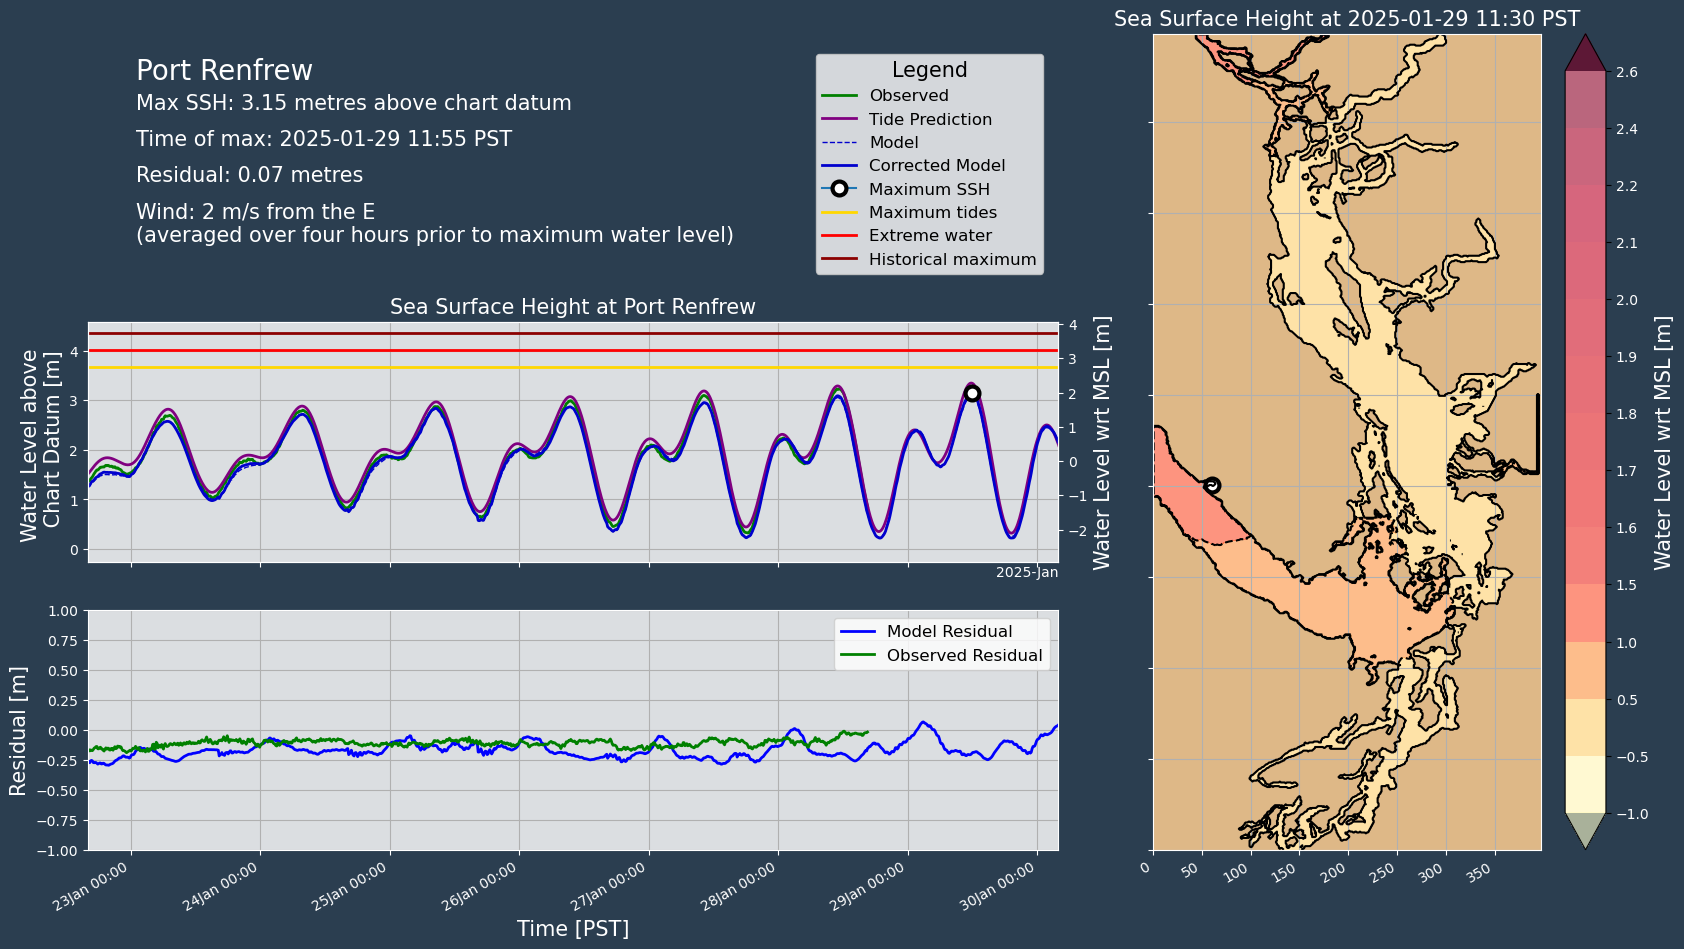

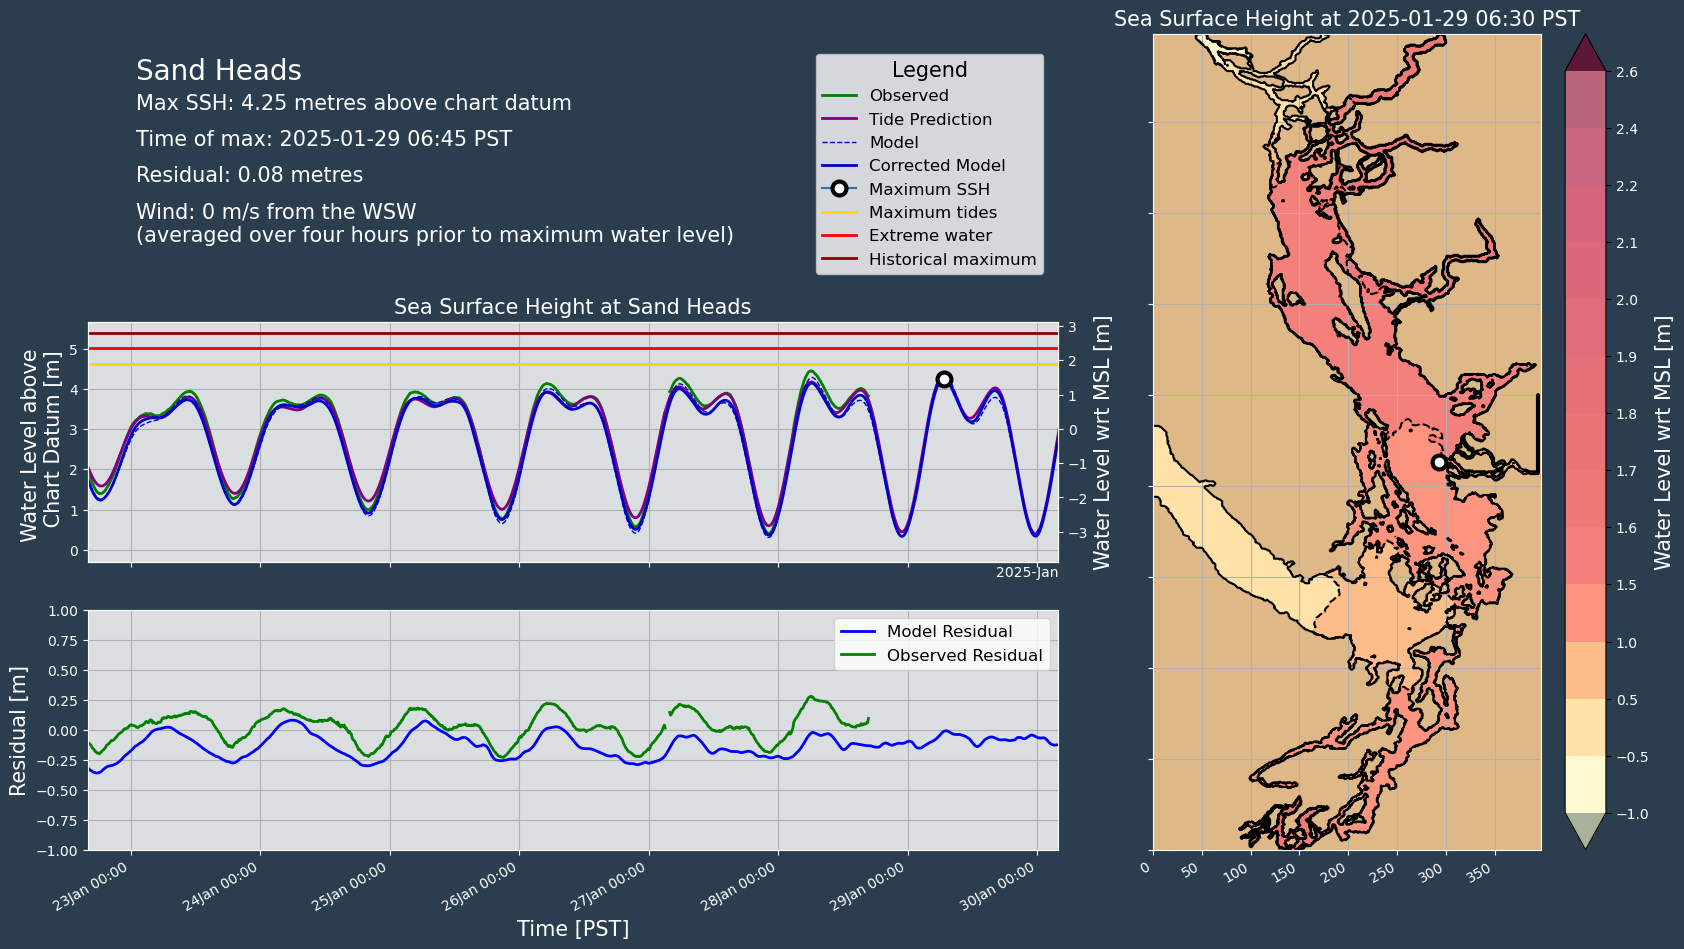

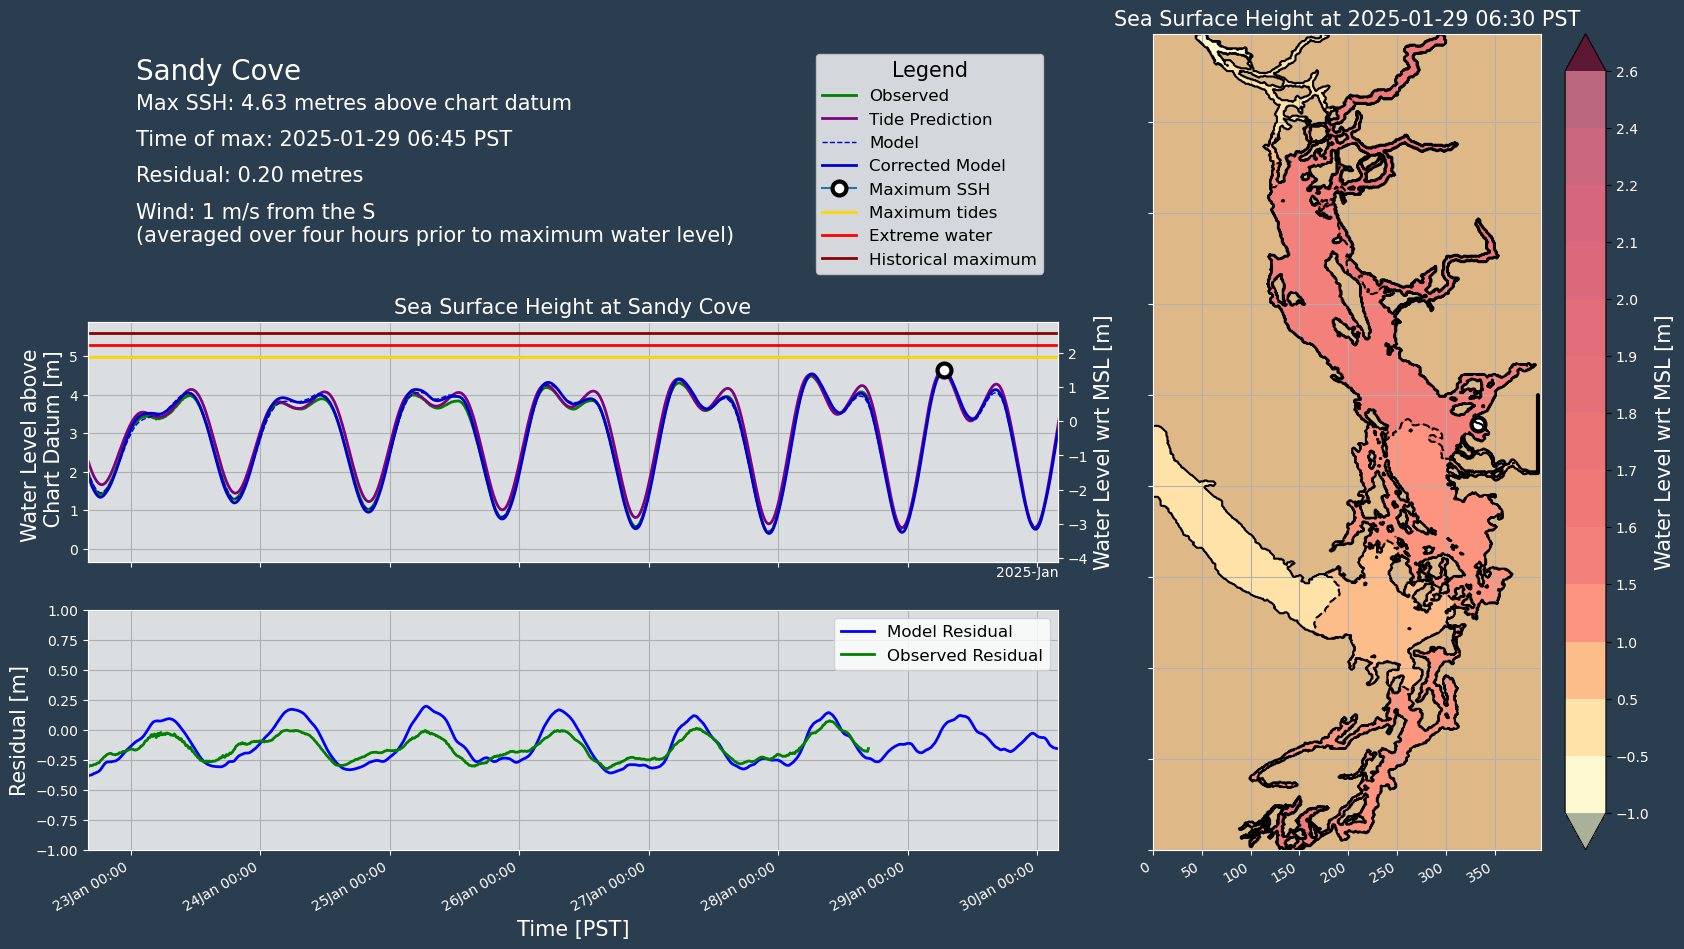

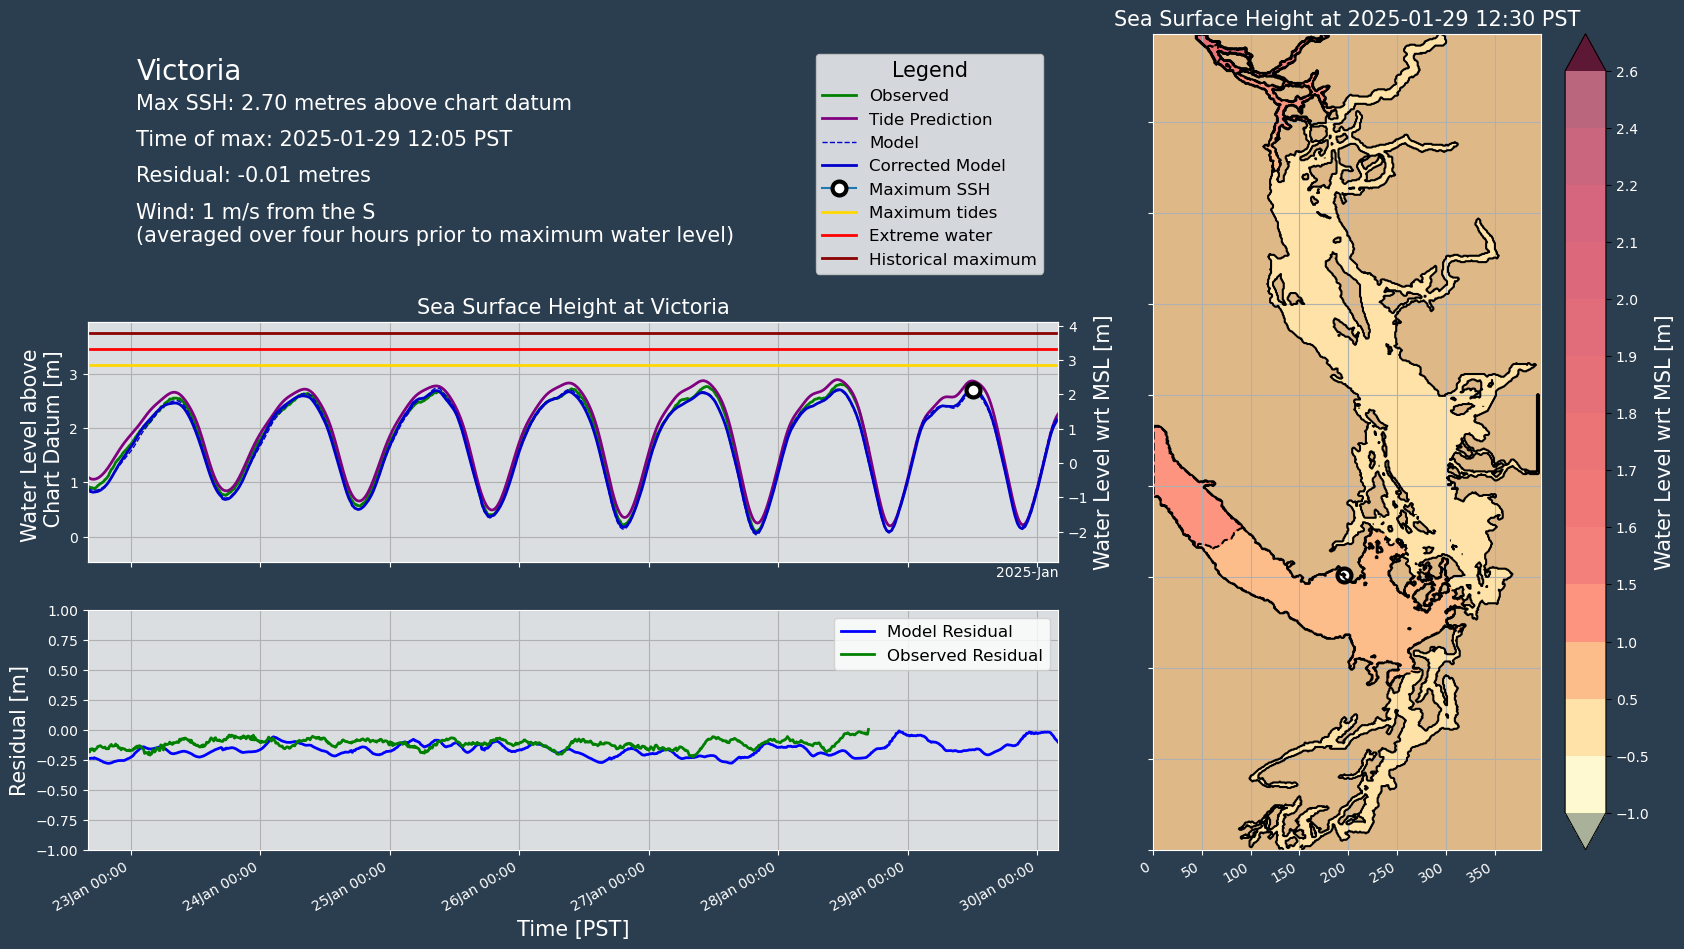

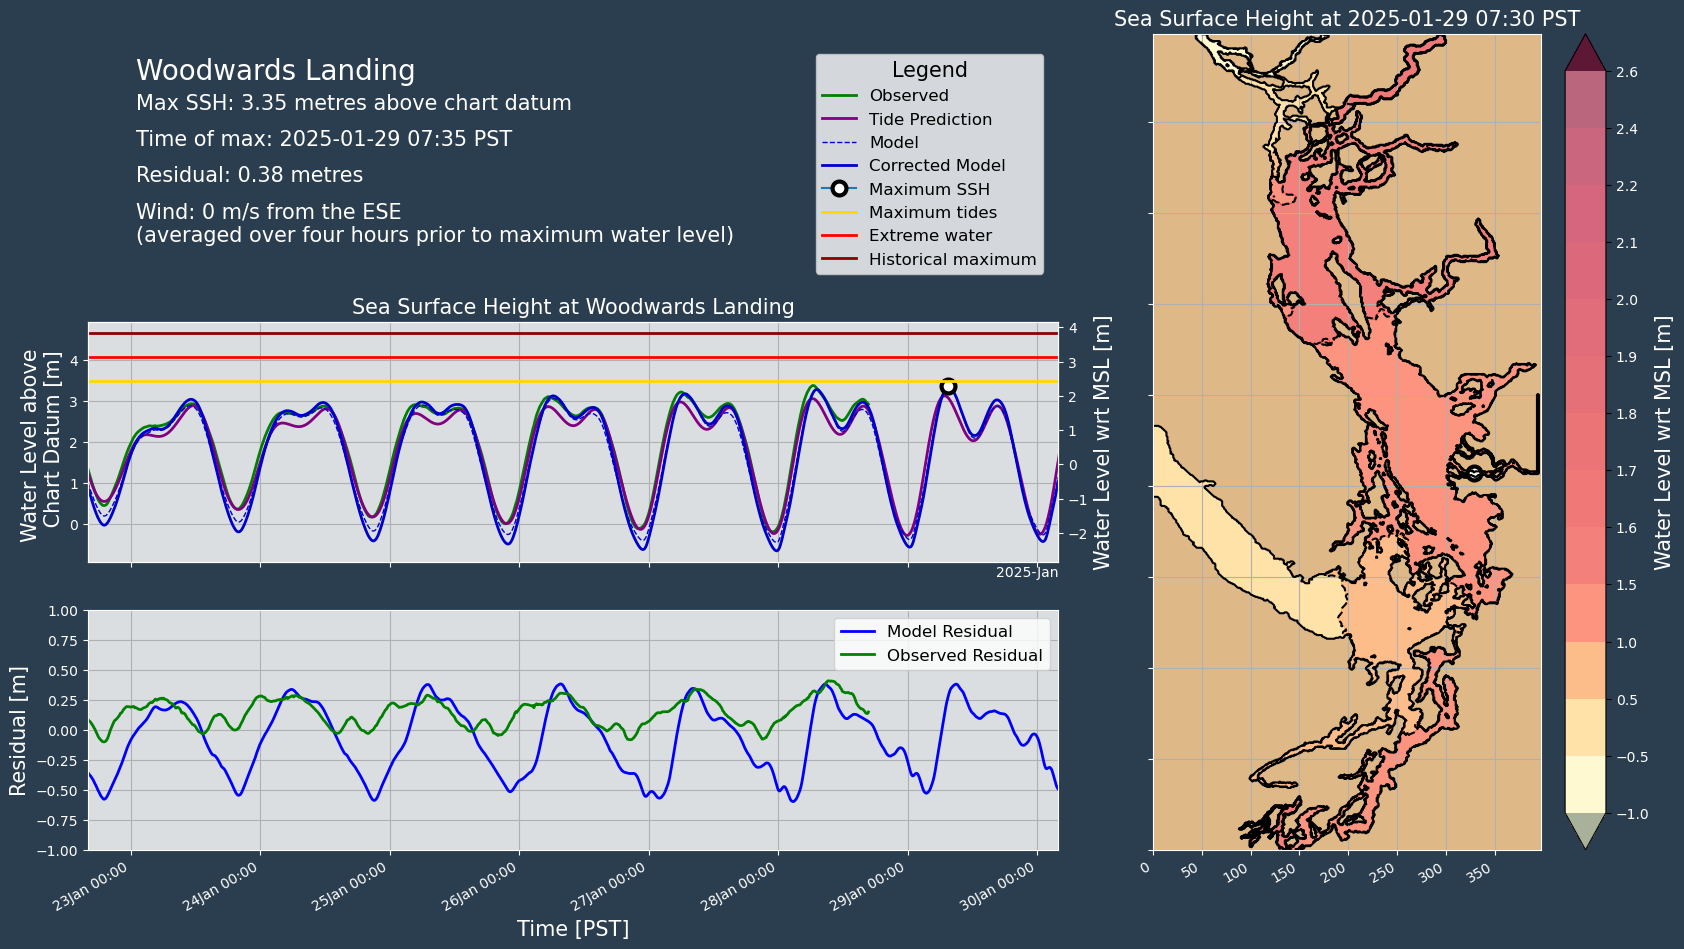

In [8]:
%%timeit -n1 -r1

from importlib import reload
from nowcast.figures import website_theme, shared
from salishsea_tools import places
reload(compare_tide_prediction_max_ssh)
reload(website_theme)
reload(shared)
reload(places)

names = {
    "Boundary Bay": "BB_maxSSH",
    "Campbell River": "CR_maxSSH",
    "Cherry Point": "CP_maxSSH",
    "Friday Harbor": "FH_maxSSH",
    # "Halfmoon Bay": "HB_maxSSH",
    "Nanaimo": "Nan_maxSSH",
    "Neah Bay": "NB_maxSSH",
    "New Westminster": "NW_maxSSH",
    "Patricia Bay": "PB_maxSSH",
    "Point Atkinson": "PA_maxSSH",
    "Port Renfrew": "PR_maxSSH",
    "Sand Heads": "SH_maxSSH",
    "Sandy Cove": "SC_maxSSH",
    # "Squamish": "Sqam_maxSSH",
    "Victoria": "Vic_maxSSH",
    "Woodwards Landing": "WL_maxSSH",
}

for name in names:
    fig = compare_tide_prediction_max_ssh.make_figure(
        name, ssh_fcst_dataset_url_tmpl, tidal_predictions, forecast_hrs,
        weather_path, bathy, grid_T_hr_path, theme=website_theme
    )